In [183]:
!pip install google-cloud-vision

In [184]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [185]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [186]:
import cv2

In [187]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [188]:
len(flags)

274

In [189]:
flags[40]

'COLOR_BGR2HLS'

In [190]:
import matplotlib.pyplot as plt
import numpy as np

In [191]:
!pip show tensorflow
!pip install --upgrade tensorflow
!pip install tensorflow==1.2
!pip install tf-nightly

Name: tensorflow
Version: 1.2.0
Summary: TensorFlow helps the tensors flow
Home-page: http://tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, protobuf, markdown, bleach, numpy, backports.weakref, wheel, html5lib, werkzeug
Required-by: fancyimpute
  Using cached https://files.pythonhosted.org/packages/97/ae/0b08f53498417914f2274cc3b5576d2b83179b0cbb209457d0fde0152174/tensorflow-2.3.0-cp36-cp36m-manylinux2010_x86_64.whl
  Found existing installation: tensorflow 1.2.0
    Uninstalling tensorflow-1.2.0:
      Successfully uninstalled tensorflow-1.2.0
  Using cached https://files.pythonhosted.org/packages/5e/55/7995cc1e9e60fa37ea90e6777d832e75026fde5c6109215d892aaff2e9b7/tensorflow-1.2.0-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079/Markdown-2.2.0-cp36-none-any.whl
ERROR: tensorboard 2.3.0 has requirement

In [192]:
import os


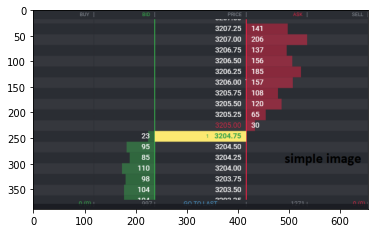

In [193]:
nemo = cv2.imread('img4.png')
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [197]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

In [198]:
light_yellow = (20, 100, 100)
dark_yellow = (30, 255, 255)

In [199]:
from matplotlib.colors import hsv_to_rgb

In [200]:
>>> lo_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) / 255.0
>>> do_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) / 255.0

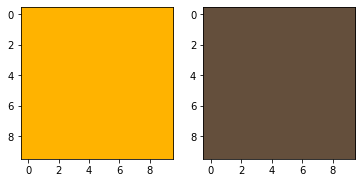

In [201]:
>>> plt.subplot(1, 2, 1)
>>> plt.imshow(hsv_to_rgb(do_square))
>>> plt.subplot(1, 2, 2)
>>> plt.imshow(hsv_to_rgb(lo_square))
>>> plt.show()

In [202]:
mask = cv2.inRange(hsv_nemo, light_yellow, dark_yellow)

In [203]:
>>> result = cv2.bitwise_and(nemo, nemo, mask=mask)

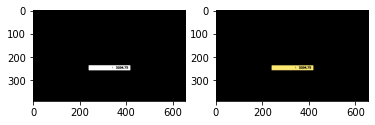

In [204]:
>>> plt.subplot(1, 2, 1)
>>> plt.imshow(mask, cmap="gray")
>>> plt.subplot(1, 2, 2)
>>> plt.imshow(result)
>>> plt.show()

In [205]:
extractedInformation = pytesseract.image_to_string(mask)
print(extractedInformation)

1 3204.75


In [280]:
head, sep, tail = extractedInformation.partition(' ')

number = float(tail)
print(number)

3204.75


In [106]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir("/content/drive/My Drive/vision_api")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [206]:
from google.cloud import vision

In [207]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='cert.json'

In [208]:
client = vision.ImageAnnotatorClient()

In [209]:
import io

path = './img4.png'
with io.open(path, 'rb') as image_file:
        content = image_file.read()

In [210]:
image = vision.types.Image(content=content)

In [211]:
response = client.text_detection(image=image)
my_input = [] 
for text in response.text_annotations:
    print('=' * 30)
    print(text.description)
    my_input.append(text.description)
    vertices = ['(%s,%s)' % (v.x, v.y) for v in text.bounding_poly.vertices]
    print('bounds:', ",".join(vertices))

BUY
BID
PRICE
ASK|
SELL
3207.25
141
3207.00 206
3206.75 137
3206.50
156
3206.25
185
3206.00
157
3205.75
108
3205.50
120
3205.25
65
3205.00 30
1 3204.75
23
95
3204.50
simple image
85
3204.25
110
3204.00
98
3203.75
104
3203.50
104
007
CO TOLACT
1271 .

bounds: (92,3),(645,3),(645,380),(92,380)
BUY
bounds: (92,5),(109,4),(109,11),(92,12)
BID
bounds: (214,5),(228,6),(228,12),(214,11)
PRICE
bounds: (381,5),(407,5),(407,11),(381,11)
ASK|
bounds: (509,3),(536,4),(536,13),(509,12)
SELL
bounds: (624,5),(645,5),(645,11),(624,11)
3207.25
bounds: (357,30),(406,31),(406,42),(357,41)
141
bounds: (428,31),(447,31),(447,40),(428,40)
3207.00
bounds: (357,52),(406,52),(406,61),(357,61)
206
bounds: (427,52),(449,52),(449,61),(427,61)
3206.75
bounds: (357,73),(406,73),(406,82),(357,82)
137
bounds: (428,73),(450,73),(450,82),(428,82)
3206.50
bounds: (357,94),(406,94),(406,103),(357,103)
156
bounds: (428,94),(449,94),(449,103),(428,103)
3206.25
bounds: (357,115),(406,115),(406,124),(357,124)
185
bounds: (42

In [283]:
lengtharrr = len(my_input);

for i in range(0, len(my_input)):
  num = my_input[i]
  if num ==  '':
    my_input.remove(num)
 

In [282]:
import numpy as np
lengtharrr = len(my_input);


fin_arr1 = []
fin_arr = []

for i in range(0, len(my_input)):  
  if i != 0:
    fin_arr1.append(my_input[i])


for j in range(0, len(fin_arr1)):
    if str(fin_arr1[j]) != "BUY":
      if str(fin_arr1[j]) != "BID":
        if str(fin_arr1[j]) != "PRICE":
          if str(fin_arr1[j]) != "ASK|":
            if str(fin_arr1[j]) != "SELL":
              if str(fin_arr1[j]) != "simple":
                if str(fin_arr1[j]) != "image":
                  if str(fin_arr1[j]) != "CO":
                    if str(fin_arr1[j]) != "TOLACT":
                      if str(fin_arr1[j]) != ".":
                        fin_arr.append(fin_arr1[j])
                      

    
    
for p in range(0, len(fin_arr)):
  print(fin_arr[p])


3207.25
141
3207.00
206
3206.75
137
3206.50
156
3206.25
185
3206.00
157
3205.75
108
3205.50
120
3205.25
65
3205.00
30
1
3204.75
23
95
3204.50
85
3204.25
110
3204.00
98
3203.75
104
3203.50
104
007
1271


In [281]:
arr_last = []

#number is received from Image_Processing#
upper_limit = number + 2
lower_limit = number - 2 

for k in range(0, len(fin_arr)):
  fin_arr[k] = float(fin_arr[k])
  if fin_arr[k] > lower_limit  and fin_arr[k] < upper_limit :
    #print(arr_last[l])
    arr_last.append(fin_arr[k])

for l in range(0, len(arr_last)):
  if arr_last[l] == number:
    break
print(arr_last[l - 1])
print(arr_last[l])
print(arr_last[l + 1])



3205.0
3204.75
3204.5


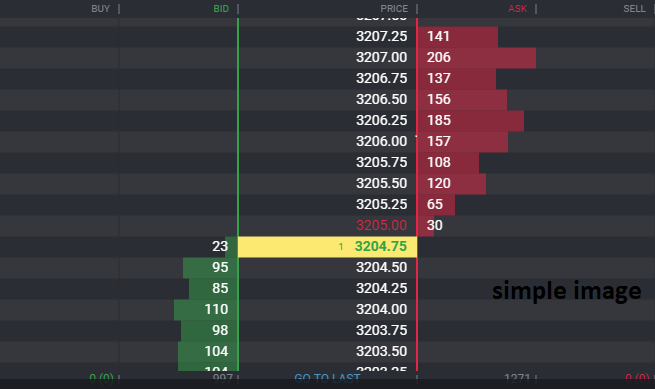

In [275]:
from IPython.display import Image
Image(filename='img4.png')  